# 머신러닝의 난제

- 우리가 머신러닝 기법을 통해 학습 데이터로부터 모델 학습을 완료하면, 실제 현장의 데이터를 입력해 사용합니다. 학습된 모델에 실제 데이터를 입력해 결과를 찾는 것을 '추론(inference)'이라고 합니다.  
  
- 이렇게 학습 데이터로 열심히 모델을 학습해도, 실제 데이터를 입력하니 제대로 작동하지 않을 수 있습니다. 그 이유는 학습 데이터는 실제 데이터의 부분집합이기 때문에 모든 상황에 맞는 모델 학습을 할 수 없기 때문입니다. 머신러닝의 모든 문제는 여기서 발생한다고 볼 수 있습니다.  

- 따라서 머신러닝 기법을 사용할 때는 실제 데이터의 특성이 잘 반영되어 있고 편향되지 않은 학습 데이터를 확보하는 것이 아주 중요합니다. 학습 데이터와 실제 데이터가 달라져도 성능 차이가 나지 않게 하는 것 `일반화(generalization)`라고 한다.
  
하기 과적합과 과소적합이 대표적인 일반화를 떨어뜨리는 주범 중에 하나입니다.

## 일반화(generalization)
- 테스트 데이터에서 만들어내는 오차를 일반화 오차라 부른다.
- 훈련 데이터에서와 같이 테스트 데이터에서도 좋은 성능을 내는 모델은 일반화가 잘 된 모델이라고 부른다.
- 모델이 너무 훈련 데이터에 과하게 학습을 하지 않도록 하는 많은 일반화 방법들이 존재한다.

# 과적합(Overfitting)/과소적합(Underfitting)

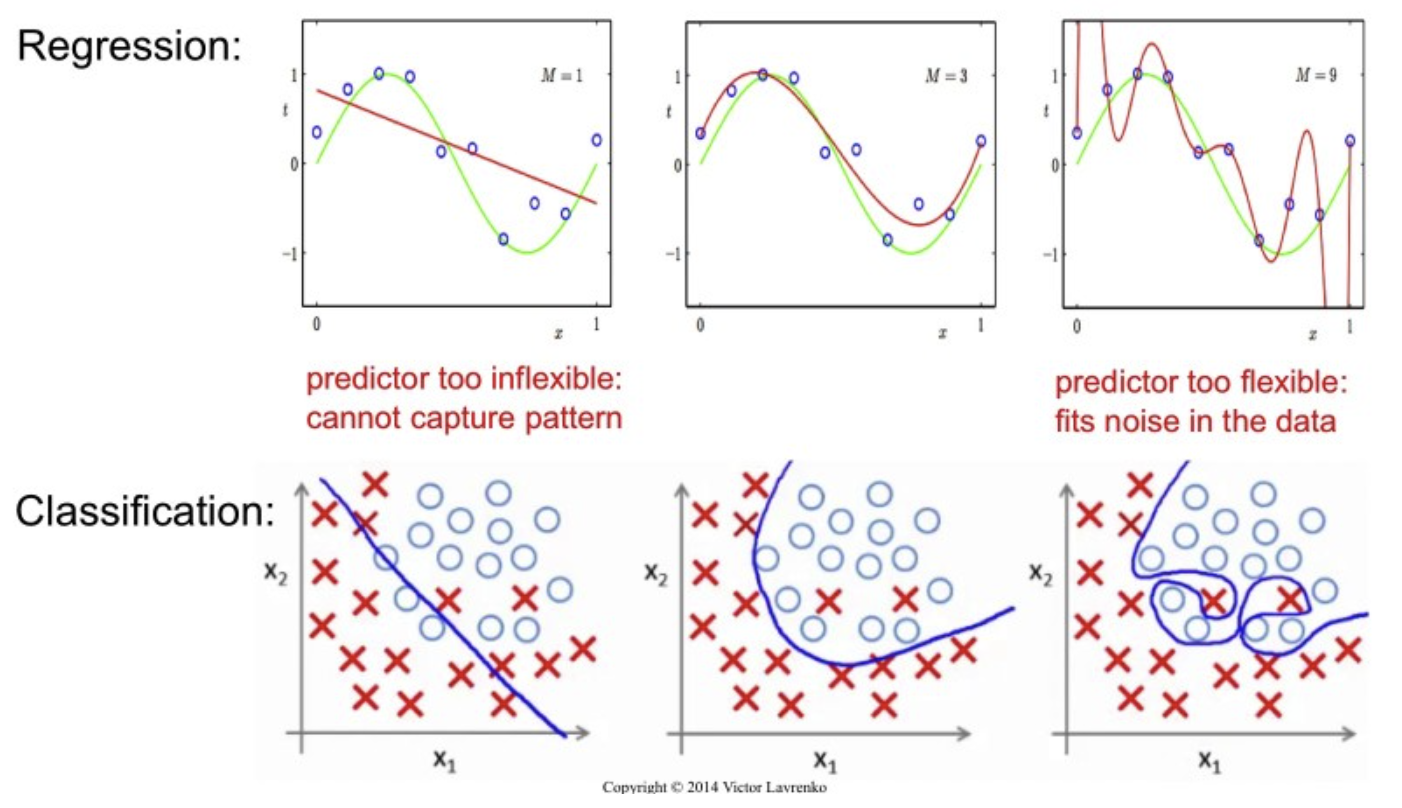

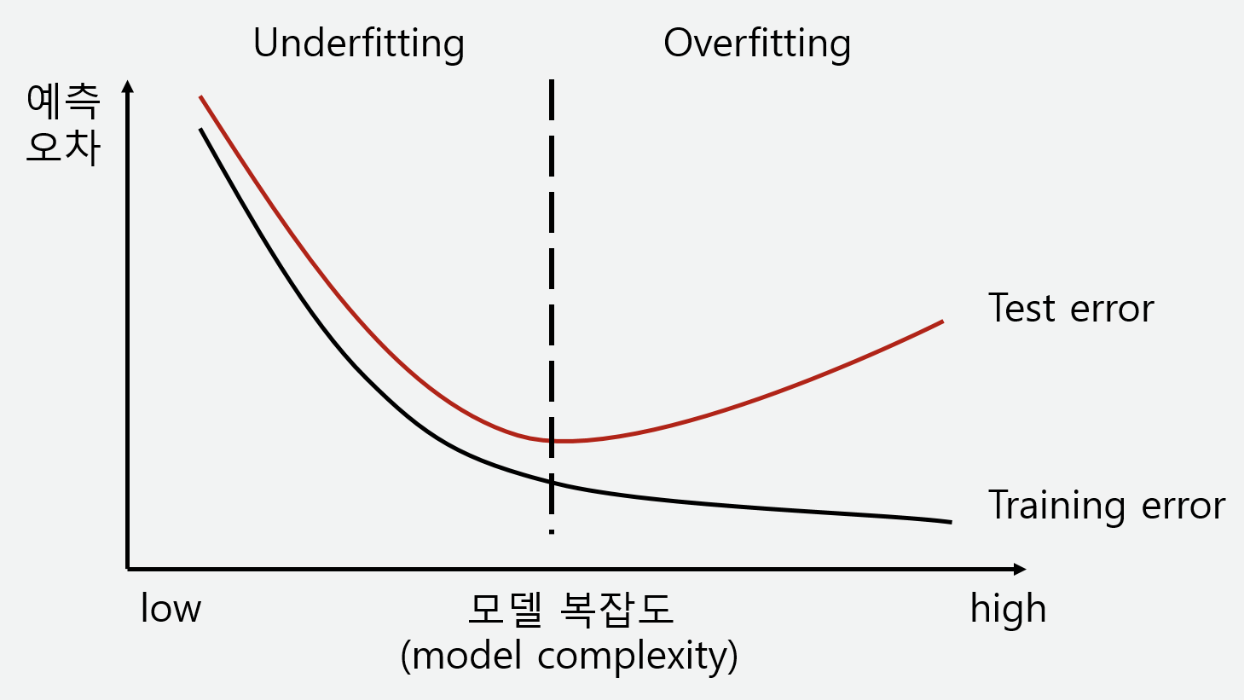

## 과대적합(overfitting)
  - 모델이 학습데이터에 필요 이상으로 적합
  - 데이터 내의 존재하는 규칙뿐만 아니라 불완전한 샘플도 학습

## 과소적합(underfitting)
  - 모델이 학습데이터에 제대로 적합하지 못함
  - 데이터 내에 존재하는 규칙도 제대로 학습 못함.

# [예제](https://github.com/WillKoehrsen/Data-Analysis/blob/master/over_vs_under/Over%20vs%20Under%20Fitting%20Example.ipynb)

In [1]:
# Numpy and pandas as usual
import numpy as np
import pandas as pd

# Scikit-Learn for fitting models
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

# For plotting in the notebook
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Default parameters for plots
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.titlesize'] = 16
matplotlib.rcParams['figure.figsize'] = [9, 7]

## Training

### Create data

In [2]:
# Set the random seed for reproducible results
np.random.seed(42)

# "True" generating function representing a process in real life
def true_gen(x):
    y = np.sin(1.2 * x * np.pi)
    return(y)

# x values and y value with a small amount of random noise
x = np.sort(np.random.rand(120))
y = true_gen(x) + 0.1 * np.random.randn(len(x))

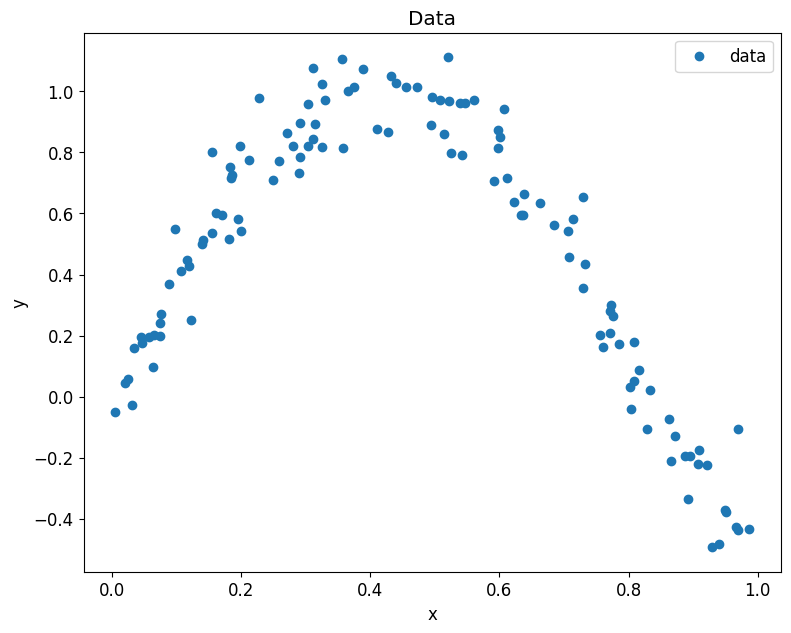

In [3]:
# Visualize observations and true curve
plt.plot(x, y, 'o', label = 'data')

plt.legend()
plt.xlabel('x');
plt.ylabel('y');
plt.title('Data');

### Training and Testing Sets

In [6]:
# Random indices for creating training and testing sets
# 데이터(x, y)를 렌덤하게 섞음 -> xt, yt
random_ind = np.random.choice(list(range(120)), size = 120, replace=False)
xt = x[random_ind]
yt = y[random_ind]

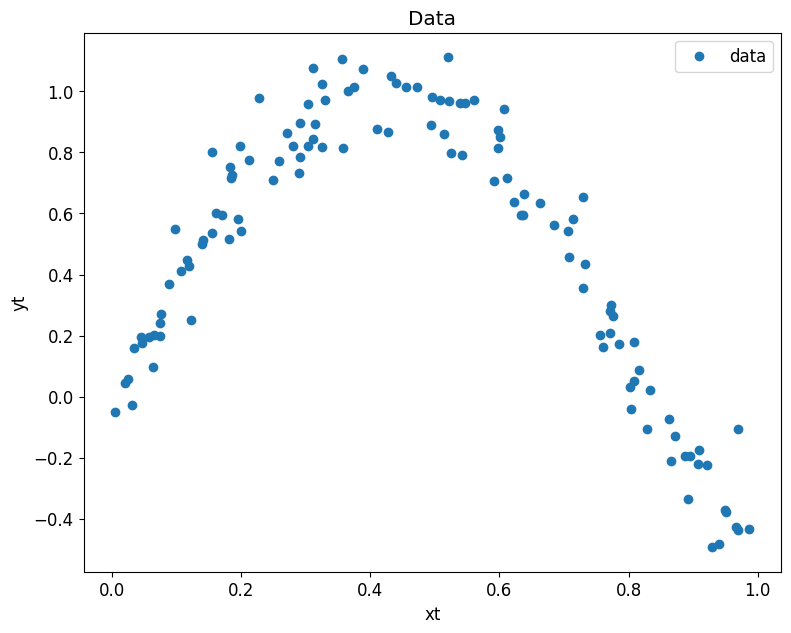

In [8]:
# Visualize observations and true curve
plt.plot(xt, yt, 'o', label = 'data')

plt.legend()
plt.xlabel('xt');
plt.ylabel('yt');
plt.title('Data');

In [9]:
# Training and testing observations
train = xt[:int(0.7 * len(x))]
test = xt[int(0.7 * len(x)):]

y_train = yt[:int(0.7 * len(y))]
y_test = yt[int(0.7 * len(y)):]

# Model the true curve
x_linspace = np.linspace(0, 1, 1000)
y_true = true_gen(x_linspace)

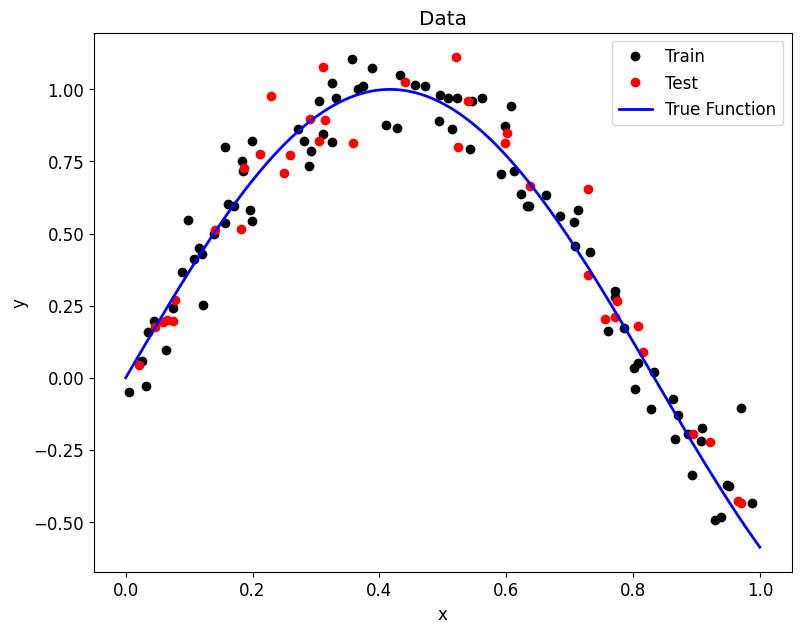

In [10]:
# Visualize observations and true curve
plt.plot(train, y_train, 'ko', label = 'Train');
plt.plot(test, y_test, 'ro', label = 'Test')
plt.plot(x_linspace, y_true, 'b-', linewidth = 2, label = 'True Function')

plt.legend()
plt.xlabel('x');
plt.ylabel('y');
plt.title('Data');

### PolynomialFeatures
> PolynomialFeatures함수를 통해 현재 데이터를 다항식 형태로 변경한다.

$ y = b + w_1x + x_2x^2 + ... +w_dx^d $
- d: 다항식의 차수
- w: 선형 회귀 가중치

다항회귀 모델
- 항이 여러 개인 가설 함수로 결과를 예측하는 회귀 모델
- 항은 제곱근이나 2차항, 3차항 등 다양하게 있으며 함수의 형태가 비선형이라는 특징이 있음


In [11]:
def convert_data(train, degrees):
    features = PolynomialFeatures(degree=degrees, include_bias=False)

    train_trans = features.fit_transform(train)

    return features, train_trans

In [12]:
def fit_model(train_trans, y_train):

    model = LinearRegression()
    model.fit(train_trans, y_train)

    return model

In [13]:
def get_predictions_error(model, x_data, y_data=None, pf=None):
    error = None

    if pf is not None:
        x_data = pf.transform(x_data)

    predictions = model.predict(x_data)

    if y_data is not None:
        error = mean_squared_error(y_data, predictions)

    return predictions, error

In [14]:
def fit_poly(train, y_train, test, y_test, degrees, plot='train', return_scores=False):

    """
    모델 학습 및 평가
    """

    train = train.reshape((-1, 1))
    test = test.reshape((-1, 1))

    # data preprocessing
    pf, train_trans = convert_data(train, degrees)

    # modeling
    model = fit_model(train_trans, y_train)

    # predictions and error
    _, training_error = get_predictions_error(model, train_trans, y_data=y_train)
    test_predictions, testing_error = get_predictions_error(model, test, y_data=y_test, pf=pf)

    # cross validation
    cross_valid = cross_val_score(model, train_trans, y_train, scoring='neg_mean_squared_error', cv = 5)

    """
    모델 예측 데이터 생성
    """

    # Find the model curve and the true curve
    x_curve = np.linspace(0, 1, 100)
    x_curve = x_curve.reshape((-1, 1))
    # True curve
    y_true_curve = true_gen(x_curve[:, 0])
    model_curve, _ = get_predictions_error(model, x_curve, pf=pf)


    """
    그래프 영역
    """

    # Plot observations, true function, and model predicted function
    if plot == 'train':
        plt.plot(train[:, 0], y_train, 'ko', label = 'Observations')
        plt.plot(x_curve[:, 0], y_true_curve, linewidth = 4, label = 'True Function')
        plt.plot(x_curve[:, 0], model_curve, linewidth = 4, label = 'Model Function')
        plt.xlabel('x'); plt.ylabel('y')
        plt.legend()
        plt.ylim(-1, 1.5); plt.xlim(0, 1)
        plt.title(f'On Training Data\n{degrees} Degree Model / Error: {round(training_error,4)}')
        plt.show()

    elif plot == 'test':
        # Plot the test observations and test predictions
        plt.plot(test, y_test, 'o', label = 'Test Observations')
        plt.plot(x_curve[:, 0], y_true_curve, 'b-', linewidth = 2, label = 'True Function')
        plt.plot(test, test_predictions, 'ro', label = 'Test Predictions')
        plt.ylim(-1, 1.5); plt.xlim(0, 1)
        plt.legend(), plt.xlabel('x'), plt.ylabel('y');
        plt.title(f'On Testing Data\n{degrees} Degree Model / Error: {round(testing_error,4)}')
        plt.show();

    # Return the metrics
    if return_scores:
        return training_error, testing_error, -np.mean(cross_valid)

## Underfitting

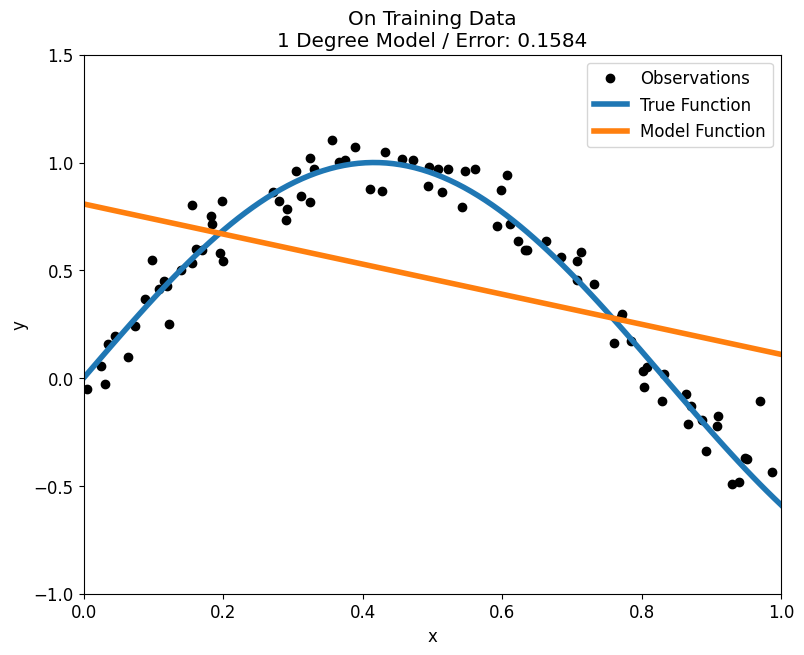

In [15]:
fit_poly(train, y_train, test, y_test, degrees = 1, plot='train')

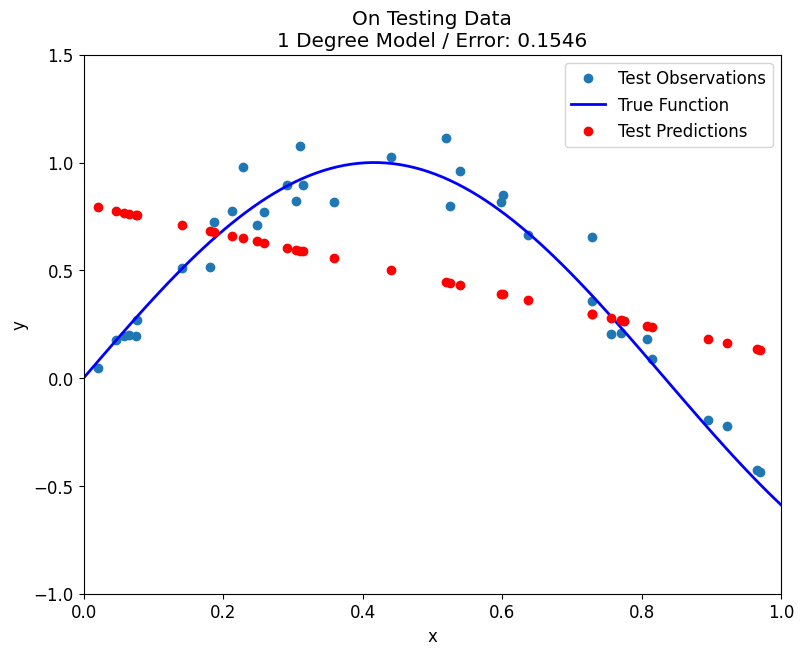

In [16]:
fit_poly(train, y_train, test, y_test, degrees = 1, plot='test')

## Overfitting

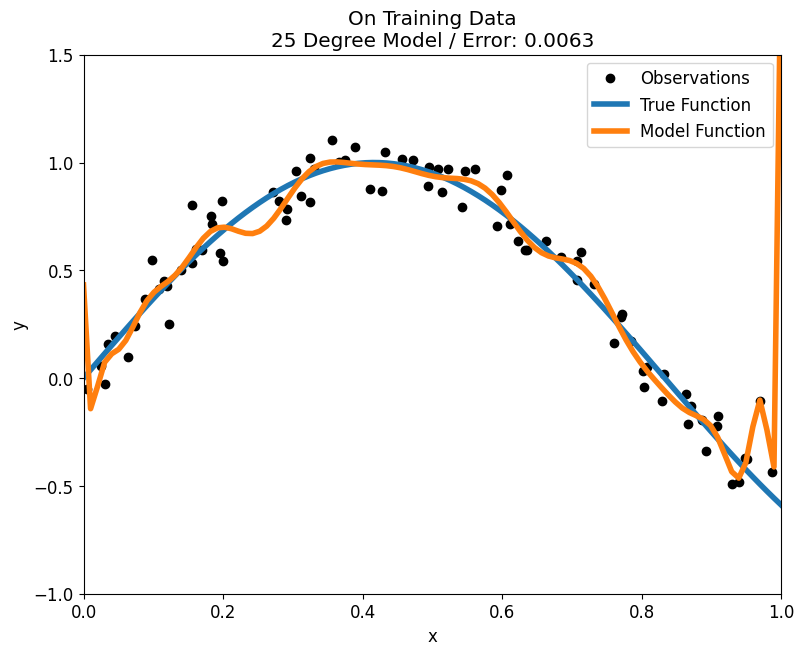

In [17]:
fit_poly(train, y_train, test, y_test, plot='train', degrees = 25)

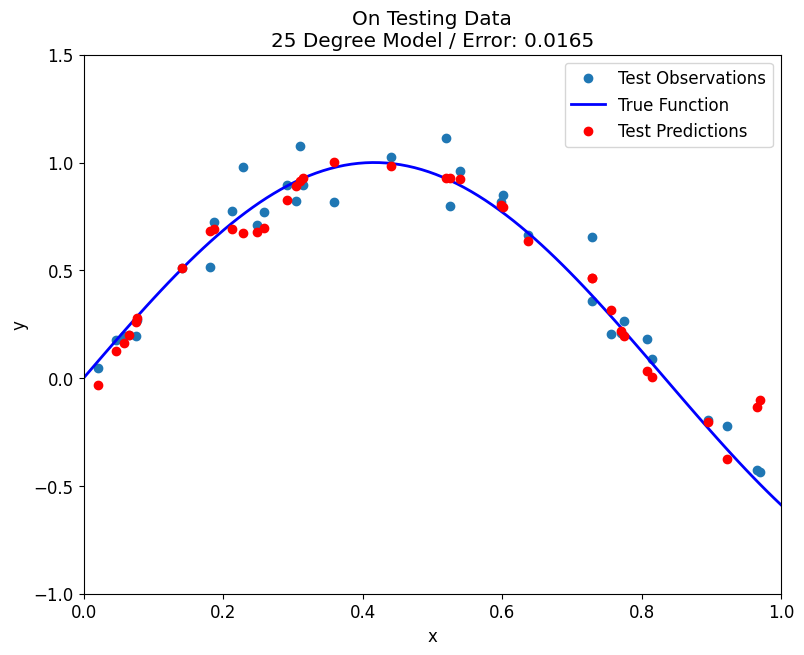

In [18]:
fit_poly(train, y_train, test, y_test, degrees=25, plot='test')

## Cross Validation

In [19]:
# Range of model degrees to evaluate
degrees = [int(x) for x in np.linspace(1, 40, 40)]

# Results dataframe
results = pd.DataFrame(0, columns = ['train_error', 'test_error', 'cross_valid'], index = degrees)

# Try each value of degrees for the model and record results
for degree in degrees:
    degree_results = fit_poly(train, y_train, test, y_test, degree, plot=False, return_scores=True)
    results.loc[degree, 'train_error'] = degree_results[0]
    results.loc[degree, 'test_error'] = degree_results[1]
    results.loc[degree, 'cross_valid'] = degree_results[2]

<ipython-input-19-0cdedb16a2a9>:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.15839099621420902' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  results.loc[degree, 'train_error'] = degree_results[0]
<ipython-input-19-0cdedb16a2a9>:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.15464381219775214' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  results.loc[degree, 'test_error'] = degree_results[1]
<ipython-input-19-0cdedb16a2a9>:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.16524390247269788' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  results.loc[degree, 'cross_valid'] = degree_results[2]


In [20]:
print('5 Lowest Cross Validation Errors\n')
train_eval = results.sort_values('cross_valid').reset_index(level=0).rename(columns={'index': 'degrees'})
train_eval.loc[:,['degrees', 'cross_valid']] .head(5)

5 Lowest Cross Validation Errors



,degrees,cross_valid
0,5,0.009917
1,6,0.010616
2,4,0.010816
3,7,0.011024
4,3,0.012043


In [21]:
results.head()

,train_error,test_error,cross_valid
1,0.158391,0.154644,0.165244
2,0.013936,0.011176,0.014512
3,0.010977,0.009617,0.012043
4,0.009326,0.009053,0.010816
5,0.008556,0.009175,0.009917


Minimum Cross Validation Error occurs at 5 degrees.



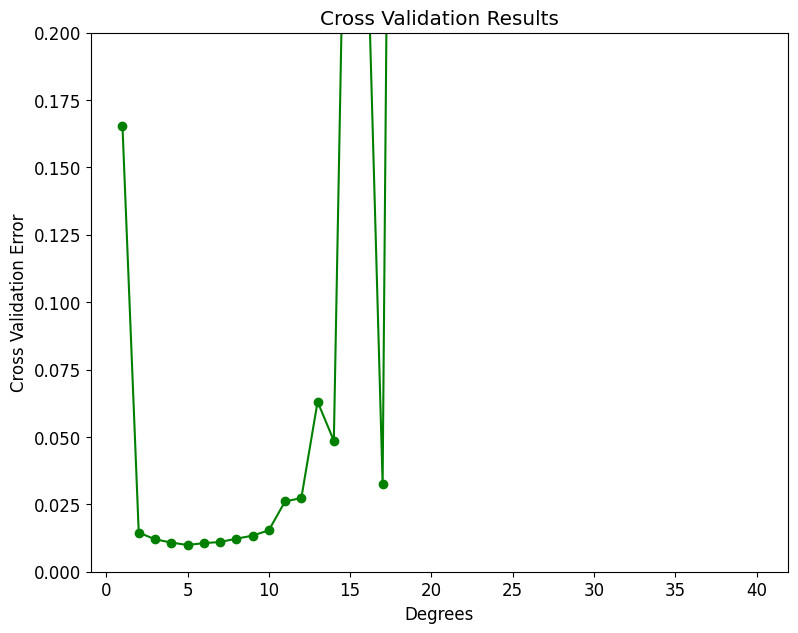

In [22]:
plt.plot(results.index, results['cross_valid'], 'go-', ms=6)
plt.xlabel('Degrees'); plt.ylabel('Cross Validation Error'); plt.title('Cross Validation Results');
plt.ylim(0, 0.2);
print('Minimum Cross Validation Error occurs at {} degrees.\n'.format(int(np.argmin(results['cross_valid']))+1))


### Best Model

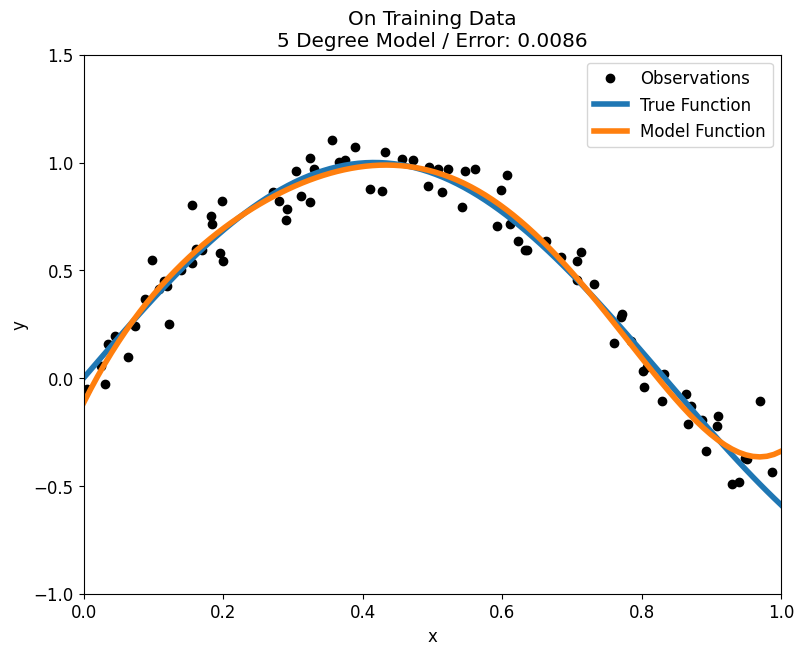

In [23]:
fit_poly(train, y_train, test, y_test, degrees=5, plot='train')

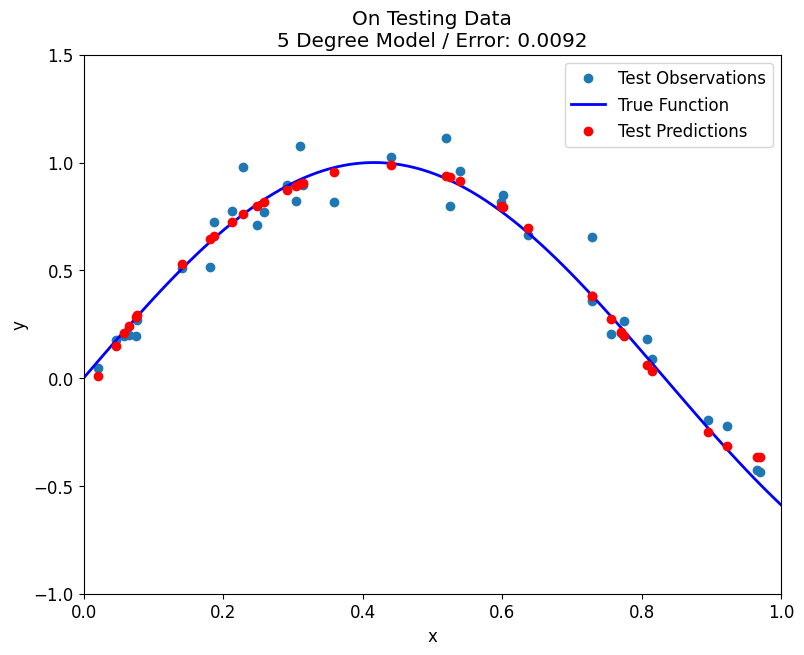

In [24]:
fit_poly(train, y_train, test, y_test, degrees=5, plot='test')

### Evaluate Models

In [25]:
print('5 Lowest Training Errors\n')
train_eval = results.sort_values('train_error').reset_index(level=0).rename(columns={'index': 'degrees'})
train_eval.loc[:,['degrees', 'train_error']] .head()

5 Lowest Training Errors



,degrees,train_error
0,39,0.006129
1,31,0.006148
2,36,0.006159
3,32,0.006165
4,35,0.006165


In [26]:
print('5 Lowest Testing Errors\n')
train_eval = results.sort_values('test_error').reset_index(level=0).rename(columns={'index': 'degrees'})
train_eval.loc[:,['degrees', 'test_error']] .head()

5 Lowest Testing Errors



,degrees,test_error
0,4,0.009053
1,6,0.009111
2,8,0.009147
3,5,0.009175
4,7,0.009177


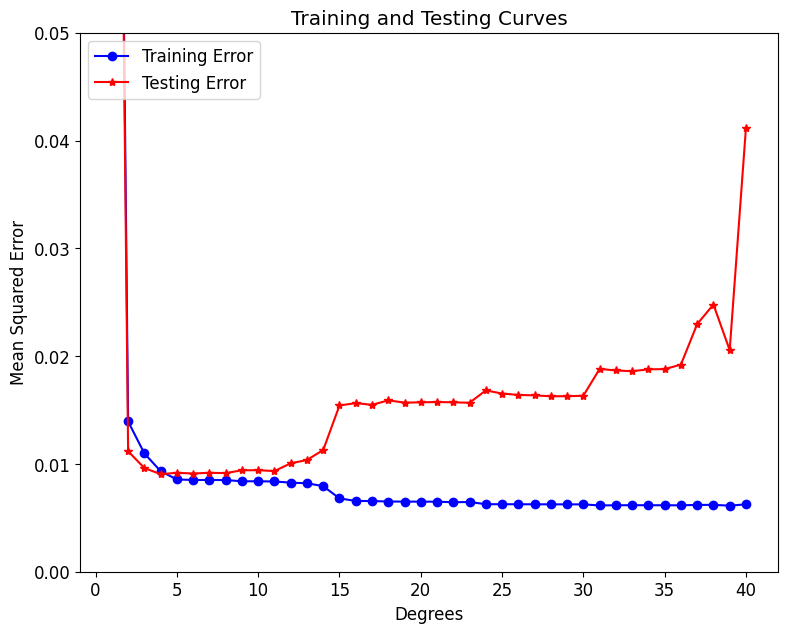


Minimum Training Error occurs at 39 degrees.
Minimum Testing Error occurs at 4 degrees.



In [27]:
plt.plot(results.index, results['train_error'], 'b-o', ms=6, label = 'Training Error')
plt.plot(results.index, results['test_error'], 'r-*', ms=6, label = 'Testing Error')
plt.legend(loc=2); plt.xlabel('Degrees'); plt.ylabel('Mean Squared Error'); plt.title('Training and Testing Curves');
plt.ylim(0, 0.05); plt.show()

print('\nMinimum Training Error occurs at {} degrees.'.format(int(np.argmin(results['train_error']))+1))
print('Minimum Testing Error occurs at {} degrees.\n'.format(int(np.argmin(results['test_error']))+1))